In [ ]:
!pip install pandas_ta

In [1]:
#Import the libraries
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import pandas_ta as ta
from requests_html import HTMLSession

In [2]:
session = HTMLSession()
num_currencies=250
resp = session.get(f"https://finance.yahoo.com/crypto?offset=0&count={num_currencies}")
tables = pd.read_html(resp.html.raw_html)               
df = tables[0].copy()
symbols_yf = df.Symbol.tolist()
print(symbols_yf[:15])
print(df.head(5))

['BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'USDC-USD', 'XRP-USD', 'BUSD-USD', 'ADA-USD', 'DOGE-USD', 'MATIC-USD', 'SOL-USD', 'DOT-USD', 'WTRX-USD', 'LTC-USD', 'DAI-USD']
     Symbol          Name  Price (Intraday)    Change % Change Market Cap  \
0   BTC-USD   Bitcoin USD        21200.8600  300.1700   +1.44%    408.42B   
1   ETH-USD  Ethereum USD         1580.6500   27.4800   +1.77%    193.43B   
2  USDT-USD    Tether USD            1.0001   -0.0002   -0.02%    66.365B   
3   BNB-USD       BNB USD          299.6900   -2.5400   -0.84%    47.939B   
4  USDC-USD  USD Coin USD            1.0001    0.0001   +0.01%    43.857B   

  Volume in Currency (Since 0:00 UTC) Volume in Currency (24Hr)  \
0                             26.789B                   26.789B   
1                              8.424B                    8.424B   
2                             35.996B                   35.996B   
3                            601.306M                  601.306M   
4                            

In [6]:
resp = requests.get("https://eodhistoricaldata.com/api/eod/BTC-USD.CC?api_token=demo&order=d&fmt=json")
json_data = json.loads(resp.content)
df = pd.DataFrame(json_data)
df

,date,open,high,low,close,adjusted_close,volume
0,2023-01-15,20977.484195,20993.748696,20606.987238,20880.799202,20880.799202,19298407543
1,2023-01-14,19910.536657,21075.141830,19907.828464,20976.299796,20976.299796,38967784639
2,2023-01-13,18868.905938,19964.322728,18753.164262,19909.574625,19909.574625,29225029694
3,2023-01-12,18117.594245,19030.087637,17995.203526,18869.588055,18869.588055,34971338710
4,2023-01-11,17446.360272,17934.896594,17337.994998,17934.896594,17934.896594,18372283782
...,...,...,...,...,...,...,...
4561,2010-07-21,0.074740,0.074740,0.074740,0.074740,0.074740,0
4562,2010-07-20,0.080800,0.080800,0.080800,0.080800,0.080800,0
4563,2010-07-19,0.085840,0.085840,0.085840,0.085840,0.085840,0
4564,2010-07-18,0.049510,0.049510,0.049510,0.049510,0.049510,0


In [7]:
#Add SMA50 and SMA200 to the df
df["sma50"] = df.close.rolling(50, min_periods=50).mean()
df["sma200"] = df.close.rolling(200, min_periods=200).mean()
df

,date,open,high,low,close,adjusted_close,volume,sma50,sma200
0,2023-01-15,20977.484195,20993.748696,20606.987238,20880.799202,20880.799202,19298407543,NaN,NaN
1,2023-01-14,19910.536657,21075.141830,19907.828464,20976.299796,20976.299796,38967784639,NaN,NaN
2,2023-01-13,18868.905938,19964.322728,18753.164262,19909.574625,19909.574625,29225029694,NaN,NaN
3,2023-01-12,18117.594245,19030.087637,17995.203526,18869.588055,18869.588055,34971338710,NaN,NaN
4,2023-01-11,17446.360272,17934.896594,17337.994998,17934.896594,17934.896594,18372283782,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4561,2010-07-21,0.074740,0.074740,0.074740,0.074740,0.074740,0,0.063643,0.188378
4562,2010-07-20,0.080800,0.080800,0.080800,0.080800,0.080800,0,0.064039,0.184727
4563,2010-07-19,0.085840,0.085840,0.085840,0.085840,0.085840,0,0.064524,0.181706
4564,2010-07-18,0.049510,0.049510,0.049510,0.049510,0.049510,0,0.064282,0.178373


In [8]:
#Cleaning data, getting rid of all NaN values
df.dropna(inplace=True)
df

,date,open,high,low,close,adjusted_close,volume,sma50,sma200
199,2022-06-30,20108.312338,20141.160361,18729.656228,19784.726495,19784.726495,26267239923,22225.841070,19527.666995
200,2022-06-29,20281.169461,20364.156097,19937.791078,20104.023178,20104.023178,23552740328,22163.666752,19523.783115
201,2022-06-28,20731.544346,21164.424097,20228.811579,20280.635650,20280.635650,21381535161,22102.559501,19520.304794
202,2022-06-27,21028.238227,21478.089364,20620.198507,20735.477947,20735.477947,20965695707,22039.603249,19524.434311
203,2022-06-26,21496.494740,21783.724766,21016.268806,21027.295309,21027.295309,18027170497,21977.409706,19535.222847
...,...,...,...,...,...,...,...,...,...
4561,2010-07-21,0.074740,0.074740,0.074740,0.074740,0.074740,0,0.063643,0.188378
4562,2010-07-20,0.080800,0.080800,0.080800,0.080800,0.080800,0,0.064039,0.184727
4563,2010-07-19,0.085840,0.085840,0.085840,0.085840,0.085840,0,0.064524,0.181706
4564,2010-07-18,0.049510,0.049510,0.049510,0.049510,0.049510,0,0.064282,0.178373


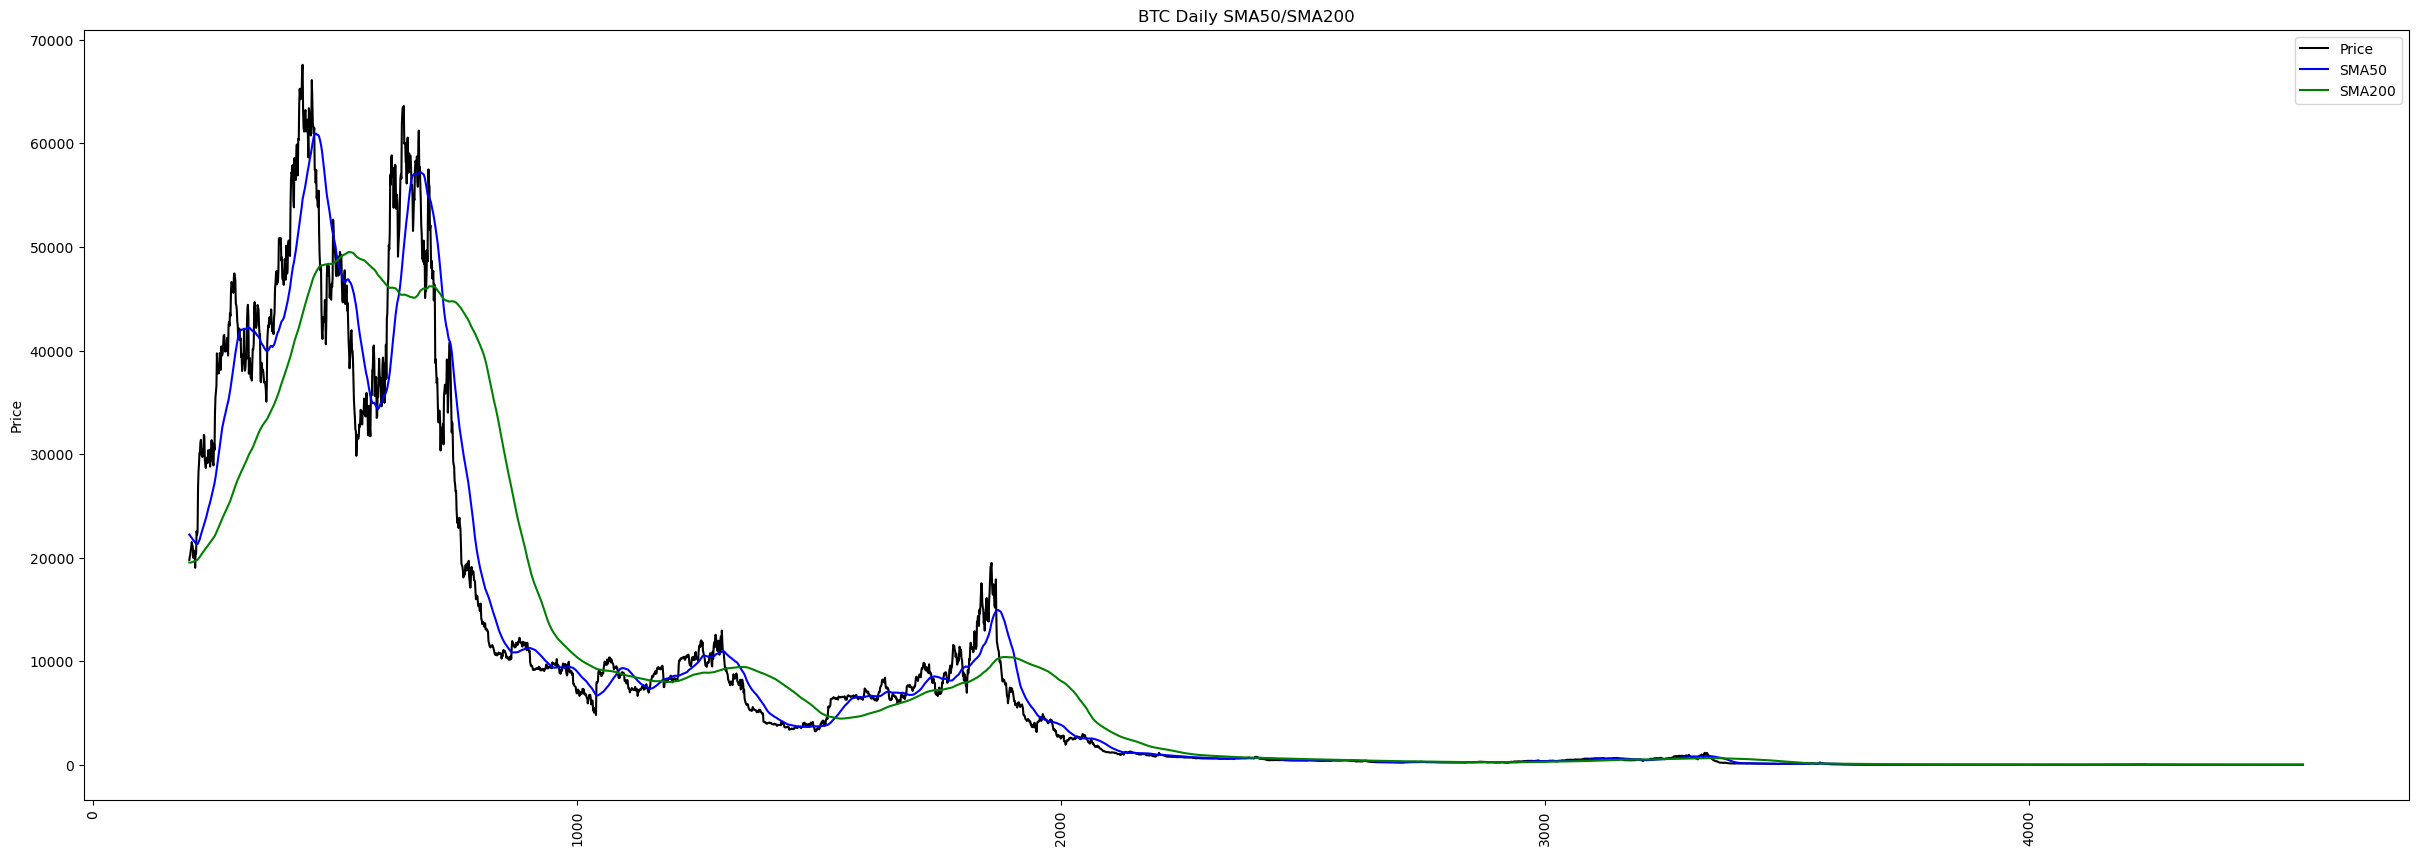

In [10]:
plt.figure(figsize=(30,10))
plt.plot(df["close"], color="black", label="Price")
plt.plot(df["sma50"], color="blue", label="SMA50")
plt.plot(df["sma200"], color="green", label="SMA200")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.title("BTC Daily SMA50/SMA200")
plt.legend()
plt.show()

In [11]:
#Reducing years of data into one
df = df.tail(365)

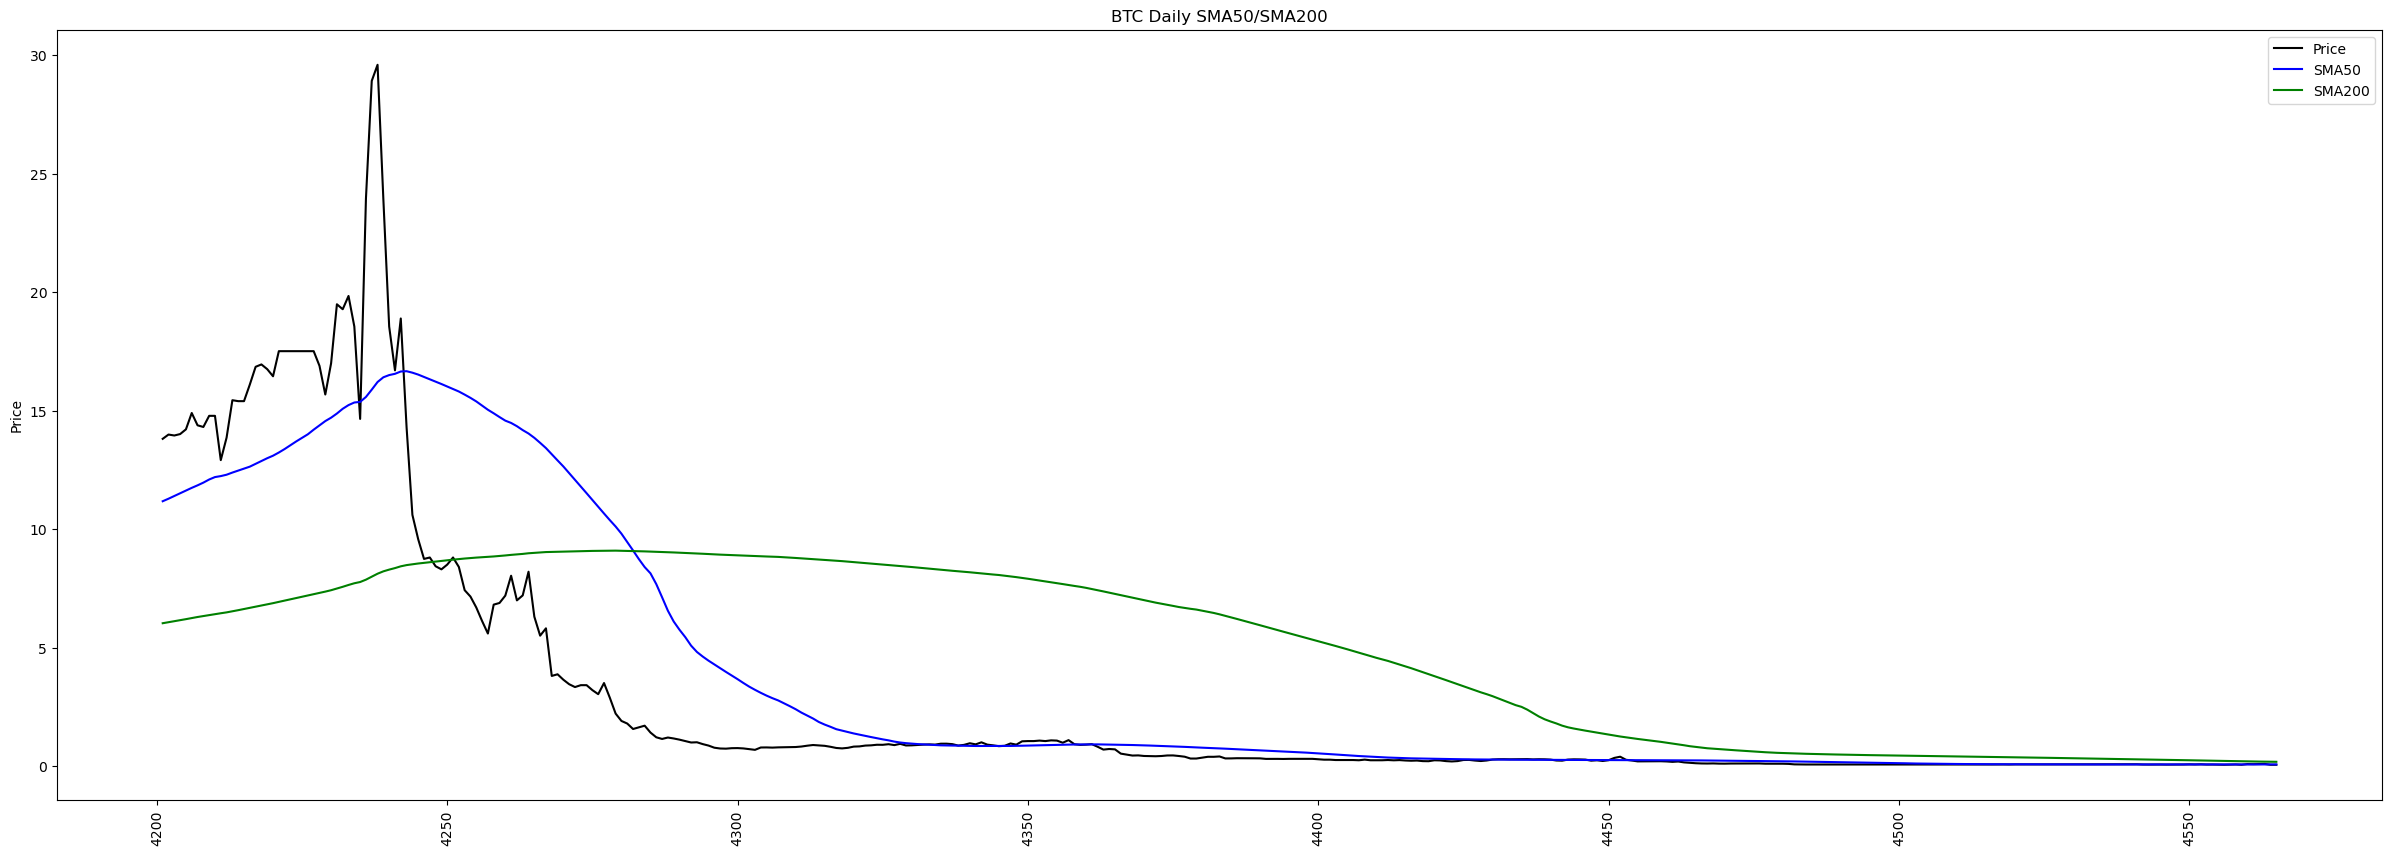

In [13]:
plt.figure(figsize=(30,10))
plt.plot(df["close"], color="black", label="Price")
plt.plot(df["sma50"], color="blue", label="SMA50")
plt.plot(df["sma200"], color="green", label="SMA200")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.title("BTC Daily SMA50/SMA200")
plt.legend()
plt.show()

In [ ]:
# Replace the x-axis ticks with the actual date.
df.set_index(['date'], inplace=True)
df

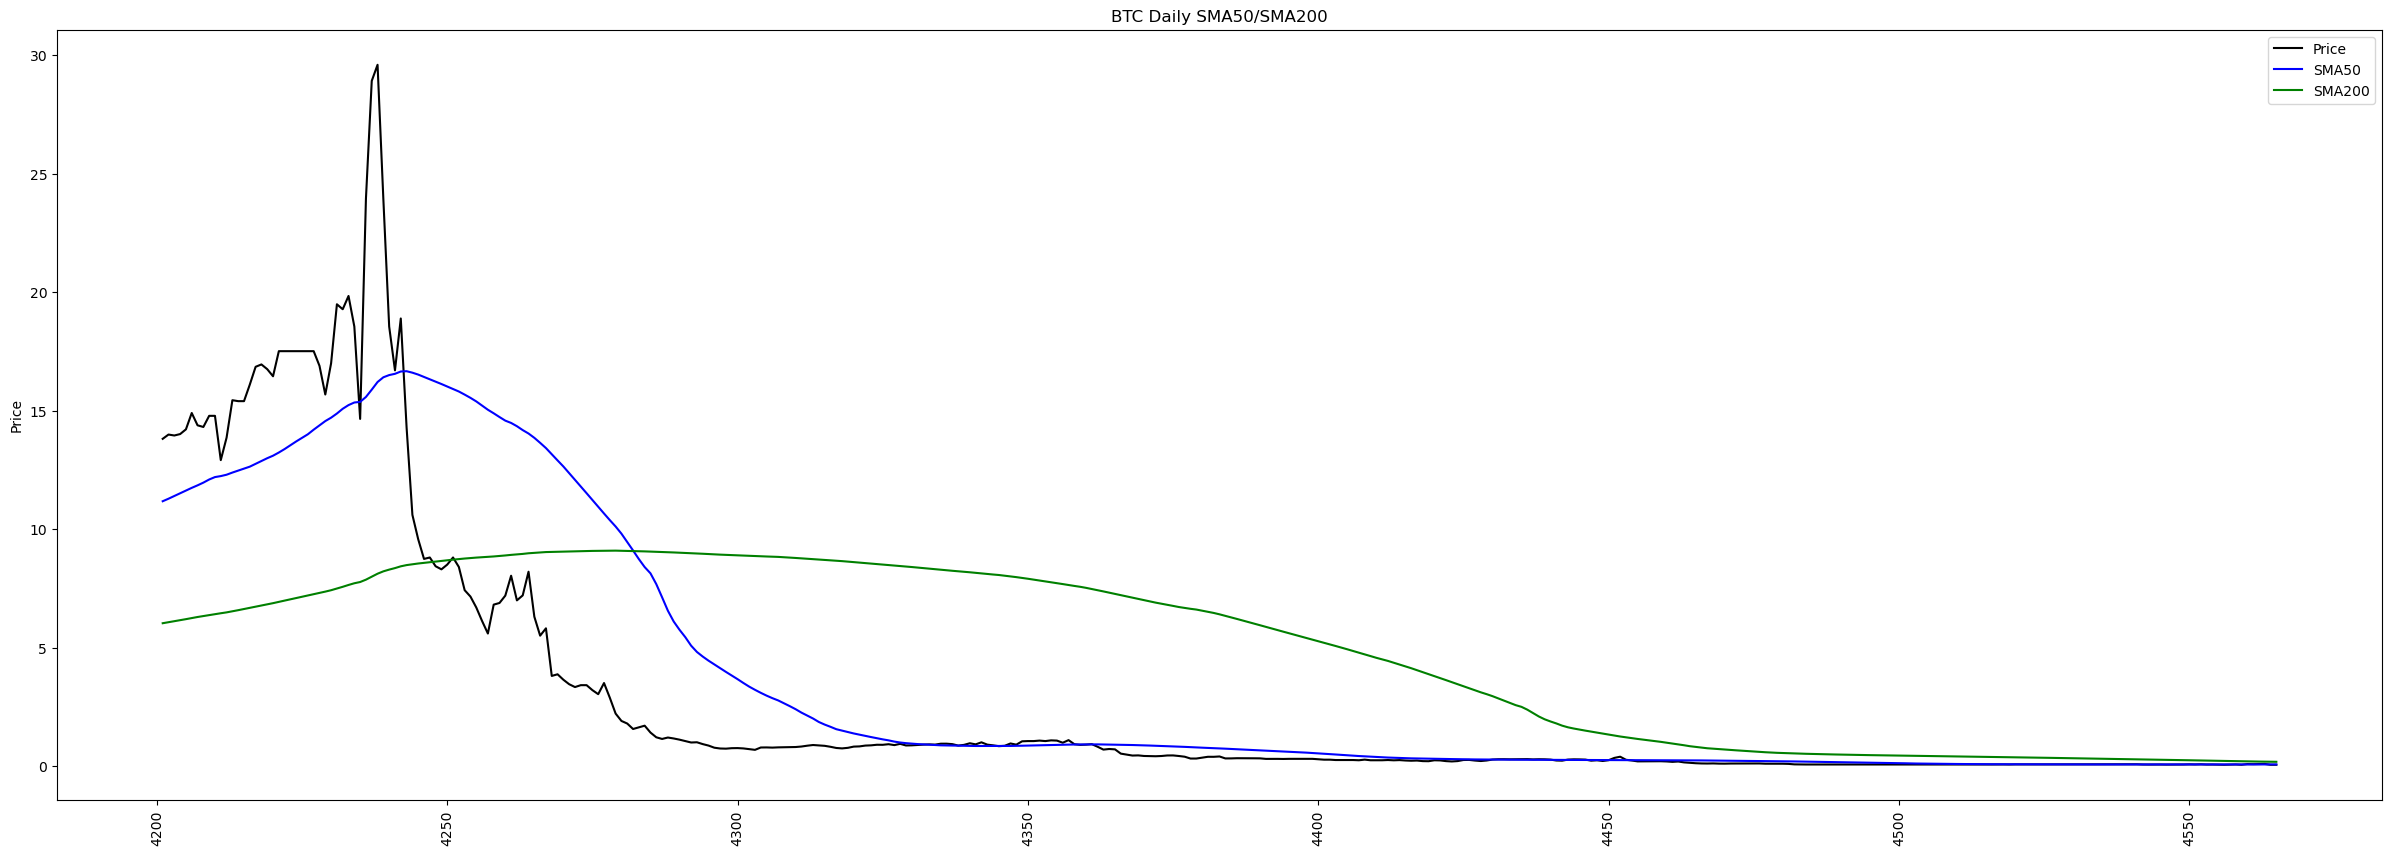

In [14]:
plt.figure(figsize=(30,10))
plt.plot(df["close"], color="black", label="Price")
plt.plot(df["sma50"], color="blue", label="SMA50")
plt.plot(df["sma200"], color="green", label="SMA200")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.title("BTC Daily SMA50/SMA200")
plt.legend()
plt.show()

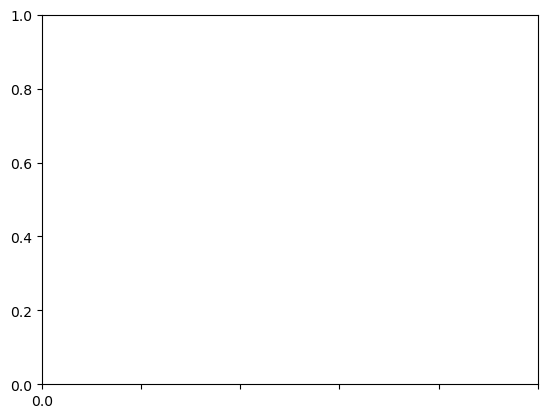

In [15]:
#Cleaning x axis ( if the index number divided by 7 doesn’t equal 0, then don’t display it.)
ax = plt.gca()
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % 7 != 0:
        label.set_visible(False)

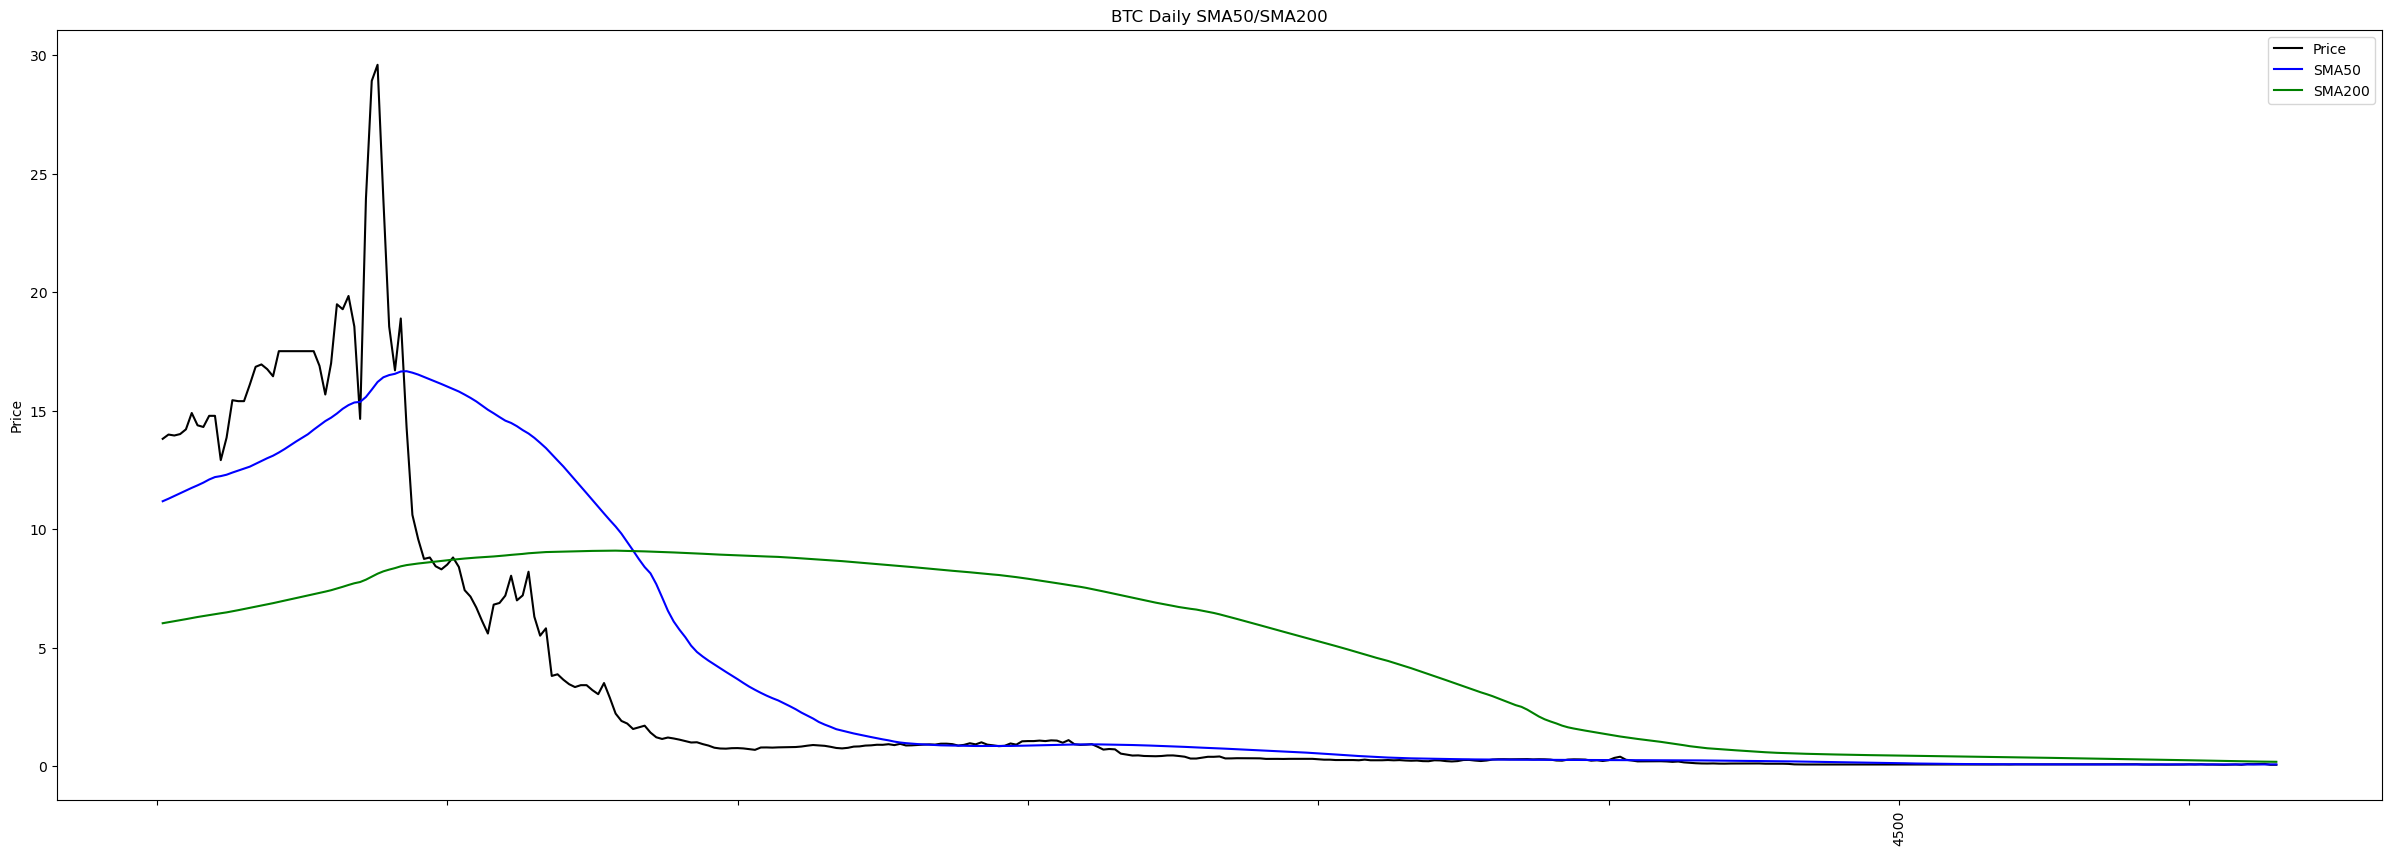

In [23]:
plt.figure(figsize=(30,10))
plt.plot(df["close"], color="black", label="Price")
plt.plot(df["sma50"], color="blue", label="SMA50")
plt.plot(df["sma200"], color="green", label="SMA200")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.title("BTC Daily SMA50/SMA200")
ax = plt.gca()
for index, label in enumerate(ax.xaxis.get_ticklabels()):
  if index % 7 != 0:
    label.set_visible(False)
plt.legend()
plt.show()

In [17]:
#Creating a boolean column & create a new feature 
pd.options.mode.chained_assignment = None

df.loc[df["sma50"] > df["sma200"], "sma50gtsma200"] = True
df["sma50gtsma200"].fillna(False, inplace=True)
df.loc[df["sma50"] < df["sma200"], "sma50ltsma200"] = True
df["sma50ltsma200"].fillna(False, inplace=True)
df

,date,open,high,low,close,adjusted_close,volume,sma50,sma200,sma50gtsma200,sma50ltsma200
4201,2011-07-16,13.81000,13.81000,13.81000,13.81000,13.81000,0,11.174800,6.025150,True,False
4202,2011-07-15,13.99000,13.99000,13.99000,13.99000,13.99000,0,11.281800,6.067650,True,False
4203,2011-07-14,13.95000,13.95000,13.95000,13.95000,13.95000,0,11.396600,6.110500,True,False
4204,2011-07-13,14.01000,14.01000,14.01000,14.01000,14.01000,0,11.512800,6.152400,True,False
4205,2011-07-12,14.21000,14.21000,14.21000,14.21000,14.21000,0,11.621200,6.197000,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4561,2010-07-21,0.07474,0.07474,0.07474,0.07474,0.07474,0,0.063643,0.188378,False,True
4562,2010-07-20,0.08080,0.08080,0.08080,0.08080,0.08080,0,0.064039,0.184727,False,True
4563,2010-07-19,0.08584,0.08584,0.08584,0.08584,0.08584,0,0.064524,0.181706,False,True
4564,2010-07-18,0.04951,0.04951,0.04951,0.04951,0.04951,0,0.064282,0.178373,False,True


In [18]:
#Finding the cross-over
df["sma50gtsma200co"] = df.sma50gtsma200.ne(df.sma50gtsma200.shift())
df.loc[df["sma50gtsma200"] == False, "sma50gtsma200co"] = False

df["sma50ltsma200co"] = df.sma50ltsma200.ne(df.sma50ltsma200.shift())
df.loc[df["sma50ltsma200"] == False, "sma50ltsma200co"] = False

df

,date,open,high,low,close,adjusted_close,volume,sma50,sma200,sma50gtsma200,sma50ltsma200,sma50gtsma200co,sma50ltsma200co
4201,2011-07-16,13.81000,13.81000,13.81000,13.81000,13.81000,0,11.174800,6.025150,True,False,True,False
4202,2011-07-15,13.99000,13.99000,13.99000,13.99000,13.99000,0,11.281800,6.067650,True,False,False,False
4203,2011-07-14,13.95000,13.95000,13.95000,13.95000,13.95000,0,11.396600,6.110500,True,False,False,False
4204,2011-07-13,14.01000,14.01000,14.01000,14.01000,14.01000,0,11.512800,6.152400,True,False,False,False
4205,2011-07-12,14.21000,14.21000,14.21000,14.21000,14.21000,0,11.621200,6.197000,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4561,2010-07-21,0.07474,0.07474,0.07474,0.07474,0.07474,0,0.063643,0.188378,False,True,False,False
4562,2010-07-20,0.08080,0.08080,0.08080,0.08080,0.08080,0,0.064039,0.184727,False,True,False,False
4563,2010-07-19,0.08584,0.08584,0.08584,0.08584,0.08584,0,0.064524,0.181706,False,True,False,False
4564,2010-07-18,0.04951,0.04951,0.04951,0.04951,0.04951,0,0.064282,0.178373,False,True,False,False


In [19]:
#Creating buy signal
buysignals = df[df["sma50gtsma200co"] == True]
buysignals

,date,open,high,low,close,adjusted_close,volume,sma50,sma200,sma50gtsma200,sma50ltsma200,sma50gtsma200co,sma50ltsma200co
4201,2011-07-16,13.81,13.81,13.81,13.81,13.81,0,11.1748,6.02515,True,False,True,False


In [20]:
#Creating sell signal
sellsignals = df[df["sma50ltsma200co"] == True]
sellsignals

,date,open,high,low,close,adjusted_close,volume,sma50,sma200,sma50gtsma200,sma50ltsma200,sma50gtsma200co,sma50ltsma200co
4283,2011-04-25,1.63,1.63,1.63,1.63,1.63,0,8.733,9.06395,False,True,False,True


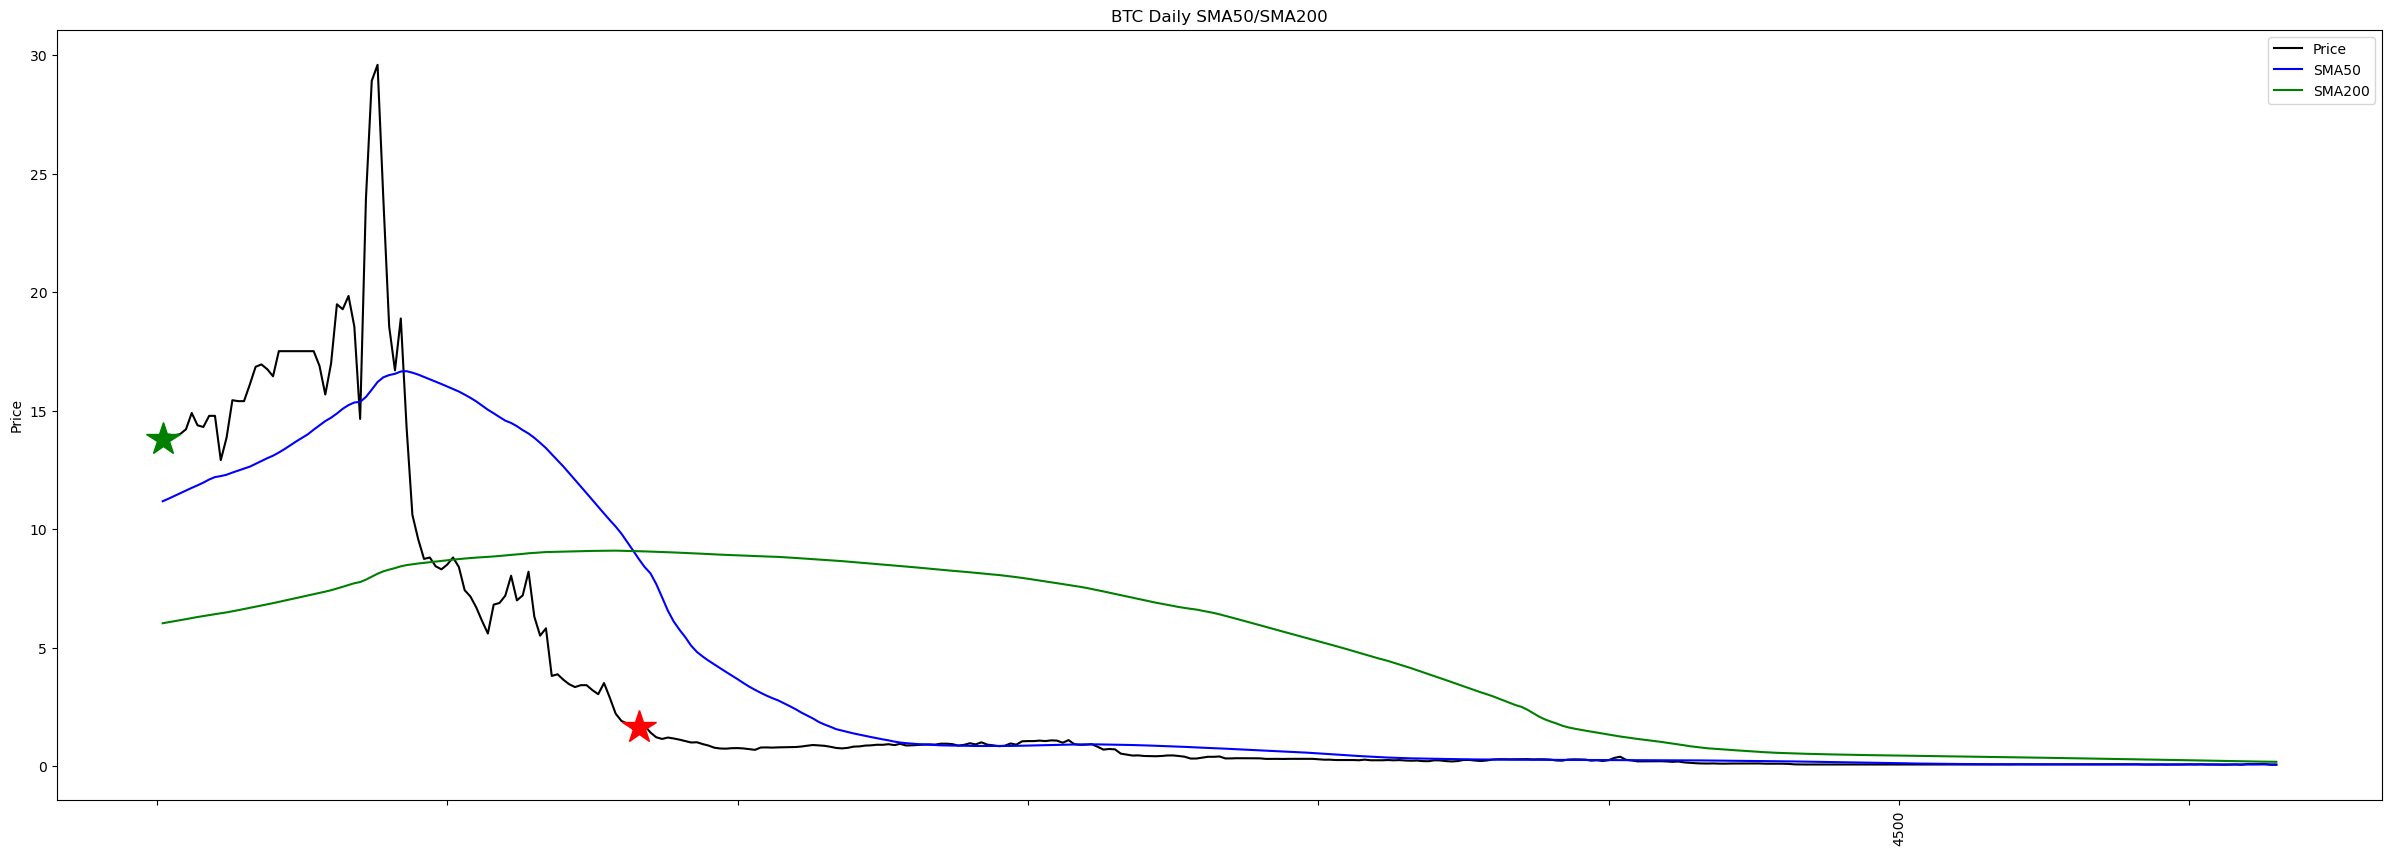

In [22]:
#plotting the trading signals ( buy and sell)
plt.figure(figsize=(30,10))
plt.plot(df["close"], color="black", label="Price")
plt.plot(df["sma50"], color="blue", label="SMA50")
plt.plot(df["sma200"], color="green", label="SMA200")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.title("BTC Daily SMA50/SMA200")
for idx in buysignals.index.tolist():
  plt.plot(
      idx,
      df.loc[idx]["close"],
      "g*",
      markersize=25
  )

for idx in sellsignals.index.tolist():
  plt.plot(
      idx,
      df.loc[idx]["close"],
      "r*",
      markersize=25
  )

ax = plt.gca()
for index, label in enumerate(ax.xaxis.get_ticklabels()):
  if index % 7 != 0:
    label.set_visible(False)
plt.legend()
plt.show()

In [24]:
#Addding the MACD
df["ema12"] = df["close"].ewm(span=12, adjust=False).mean()
df["ema26"] = df["close"].ewm(span=26, adjust=False).mean()

In [25]:
df["macd"] = df["ema12"] - df["ema26"]        
df["signal"] = df["macd"].ewm(span=9, adjust=False).mean()

In [26]:
df["macd"] = df["ema12"] - df["ema26"]        
df["signal"] = df["macd"].ewm(span=9, adjust=False).mean()

In [27]:
df.loc[df["macd"] < df["signal"], "macdltsignal"] = True
df["macdltsignal"].fillna(False, inplace=True)

df

,date,open,high,low,close,adjusted_close,volume,sma50,sma200,sma50gtsma200,sma50ltsma200,sma50gtsma200co,sma50ltsma200co,ema12,ema26,macd,signal,macdltsignal
4201,2011-07-16,13.81000,13.81000,13.81000,13.81000,13.81000,0,11.174800,6.025150,True,False,True,False,13.810000,13.810000,0.000000,0.000000,False
4202,2011-07-15,13.99000,13.99000,13.99000,13.99000,13.99000,0,11.281800,6.067650,True,False,False,False,13.837692,13.823333,0.014359,0.002872,False
4203,2011-07-14,13.95000,13.95000,13.95000,13.95000,13.95000,0,11.396600,6.110500,True,False,False,False,13.854970,13.832716,0.022254,0.006748,False
4204,2011-07-13,14.01000,14.01000,14.01000,14.01000,14.01000,0,11.512800,6.152400,True,False,False,False,13.878821,13.845848,0.032973,0.011993,False
4205,2011-07-12,14.21000,14.21000,14.21000,14.21000,14.21000,0,11.621200,6.197000,True,False,False,False,13.929772,13.872822,0.056949,0.020984,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4561,2010-07-21,0.07474,0.07474,0.07474,0.07474,0.07474,0,0.063643,0.188378,False,True,False,False,0.063528,0.063149,0.000378,-0.001182,False
4562,2010-07-20,0.08080,0.08080,0.08080,0.08080,0.08080,0,0.064039,0.184727,False,True,False,False,0.066185,0.064457,0.001728,-0.000600,False
4563,2010-07-19,0.08584,0.08584,0.08584,0.08584,0.08584,0,0.064524,0.181706,False,True,False,False,0.069209,0.066041,0.003168,0.000154,False
4564,2010-07-18,0.04951,0.04951,0.04951,0.04951,0.04951,0,0.064282,0.178373,False,True,False,False,0.066178,0.064816,0.001362,0.000395,False


In [28]:
buysignals = df[(df["sma50gtsma200co"] == 1) & (df["macdltsignal"] == 1)]

In [29]:
buysignals

,date,open,high,low,close,adjusted_close,volume,sma50,sma200,sma50gtsma200,sma50ltsma200,sma50gtsma200co,sma50ltsma200co,ema12,ema26,macd,signal,macdltsignal


In [30]:
sellsignals = df[(df["sma50ltsma200co"] == 1) & (df["macdltsignal"] == 1)]

In [31]:
sellsignals

,date,open,high,low,close,adjusted_close,volume,sma50,sma200,sma50gtsma200,sma50ltsma200,sma50gtsma200co,sma50ltsma200co,ema12,ema26,macd,signal,macdltsignal


In [32]:
df.macdltsignal

4201    False
4202    False
4203    False
4204    False
4205    False
        ...  
4561    False
4562    False
4563    False
4564    False
4565     True
Name: macdltsignal, Length: 365, dtype: bool

In [33]:
# #Combine SMA50/200 and MACD/Signal into composite buy and sell trading signals
df["macdltsignalco"] = df.macdltsignal.ne(df.macdltsignal.shift())
df.loc[df["macdltsignal"] == False, "macdltsignalco"] = False

# df["macdltsignalco"] = df.macdltsignal.ne(df.macdltsignal.shift())
# df.loc[df["macdltsignal"] == False, "macdltsignalco"] = False

buysignals = df[(df["sma50gtsma200co"] == 1) & (df["macdltsignal"] == 1)]

sellsignals = df[(df["sma50gtsma200"] == 1) & (df["macdltsignalco"] == 1)]

In [37]:
#Calculate the RSI14
df["rsi14"] = ta.rsi(df["close"], length=14, fillna=50)
df["rsi170"] = ta.rsi(df["close"],length=70)

<AxesSubplot:>

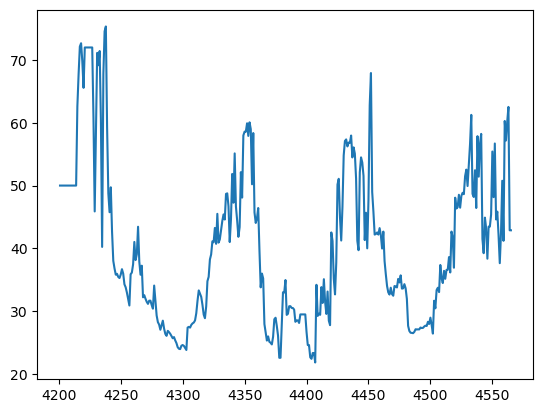

In [38]:
df["rsi14"]

<AxesSubplot:>

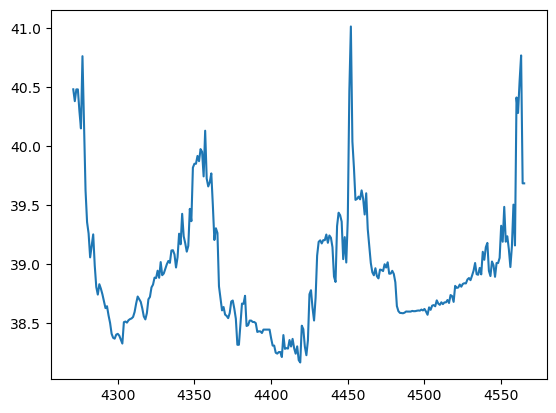

In [39]:
df["rsi170"].plot()